In [2]:
import numpy as np
import matplotlib.pyplot as plt

def vicsek_model_2(L,eta):
    xi = np.random.randint(L, size=(N))
    xf = np.random.rand(N)
    x = np.add(xi,xf)
    yi = np.random.randint(L, size=(N))
    yf = np.random.rand(N)
    y = np.add(yi,yf)
    va = []

    theta = np.random.uniform(low = 0, high = 2*np.pi, size = N)
    vx = []
    vy = [] 
    vv = [] #velocity vector - vv
    r = []# position
    for i in range(N):
        vx.append(v*np.cos(theta[i]))
        vy.append(v*np.sin(theta[i]))
        vv.append([v*np.cos(theta[i]),v*np.sin(theta[i])])
        r.append([x[i],y[i]])


    for p in range(20):
        theta_avg = [] # array to store theta averages
        for i in range(N):
            ic = []  # index counter
            t_a = 0  # theta average
            for j in range(N):
                if j != i:
                    if x[i]<d and x[j]>(L-(d-x[i])):
                        distance = np.sqrt((x[j]-L - x[i])**2 + (y[j] - y[i])**2)
                        if distance <= d:
                            ic.append(j)
                    elif x[i]>L-d and x[j]<(d+x[i])-L:
                        distance = np.sqrt((x[j]+L - x[i])**2 + (y[j] - y[i])**2)
                        if distance <= d:
                            ic.append(j)
                    else :
                        distance = np.sqrt((x[j] - x[i])**2 + (y[j] - y[i])**2)
                        if distance <= d:
                            ic.append(j)

            if ic:  # Check if ic is not empty
                for k in range(len(ic)):
                    t_a += theta[ic[k]]
                t_a = t_a / len(ic)
            else:
                # If ic is empty, set the average to some default value or handle it as needed
                t_a = theta[i]  # For example, setting it to zero
            theta_avg.append(t_a)
        delta_theta = np.random.uniform(low = -eta/2, high = eta/2, size = N)

        theta = np.add(theta_avg, delta_theta)

        x1 = []
        y1 = []
        vx1 = []
        vy1 = []

        for i in range(N):
            x1.append(x[i]+vx[i]*t)
            y1.append(y[i]+vy[i]*t)
            vx1.append(v*np.cos(theta[i]))
            vy1.append(v*np.sin(theta[i]))

        x = x1
        y = y1
        vx = vx1
        vy = vy1

        va_x = 0
        va_y = 0
        for k in range(len(vx)):
            va_x += vx[k]
            va_y += vy[k]
        va_ = np.sqrt(va_x**2 + va_y**2)/(N*v)

        va.append(va_)


    tol=0.0002
    s = 0
    for i in range(len(va)-1):
        if tol>va[i+1] - va[i]:
            s = i
            break
    va_avg = 0
    for i in range(s, len(va)):
        va_avg += va[i]
    va_avg = va_avg/(len(va)-s)
    return(va_avg)
    

        


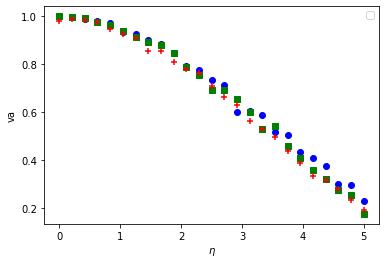

In [3]:
N0 = 40
L0 = 3.1
ro = N0/L0**2
v = 0.03
d = 1
t = 1

N_  = [40,100,400]
eta_ = np.linspace(0,5,25)
mark = ['o','s','+']
col = ['b','g','r']
for i in range(len(N_)):
    L = np.sqrt(N_[i]/ro)
    N = N_[i]
    va = []
    for j in range(len(eta_)):
        eta = eta_[j]
        va_ = vicsek_model_2(L, eta)
        va.append(va_)
    plt.scatter(eta_,va,marker=mark[i],color=col[i])

plt.xlabel('$\eta$')
plt.ylabel('va')
plt.legend(f'N = {value}' for value in [40, 100, 400, 4000, 10000])


In [20]:
T = np.linspace(1,20,20)
N = 300
L = 5
v = 0.03
d = 1
t = 1
eta = 0.1


xi = np.random.randint(L, size=(N))
xf = np.random.rand(N)
x = np.add(xi,xf)
yi = np.random.randint(L, size=(N))
yf = np.random.rand(N)
y = np.add(yi,yf)
va = []

theta = np.random.uniform(low = 0, high = 2*np.pi, size = N)
vx = []
vy = [] 
vv = [] #velocity vector - vv
r = []# position
for i in range(N):
    vx.append(v*np.cos(theta[i]))
    vy.append(v*np.sin(theta[i]))
    vv.append([v*np.cos(theta[i]),v*np.sin(theta[i])])
    r.append([x[i],y[i]])


for p in range(20):
    theta_avg = [] # array to store theta averages
    for i in range(N):
        ic = []  # index counter
        t_a = 0  # theta average
        for j in range(N):
            if j != i:
                if x[i]<d and x[j]>(L-(d-x[i])):
                    distance = np.sqrt((x[j]-L - x[i])**2 + (y[j] - y[i])**2)
                    if distance <= d:
                        ic.append(j)
                elif x[i]>L-d and x[j]<(d+x[i])-L:
                    distance = np.sqrt((x[j]+L - x[i])**2 + (y[j] - y[i])**2)
                    if distance <= d:
                        ic.append(j)
                else :
                    distance = np.sqrt((x[j] - x[i])**2 + (y[j] - y[i])**2)
                    if distance <= d:
                        ic.append(j)

        if ic:  # Check if ic is not empty
            for k in range(len(ic)):
                t_a += theta[ic[k]]
            t_a = t_a / len(ic)
        else:
            # If ic is empty, set the average to some default value or handle it as needed
            t_a = theta[i]  # For example, setting it to zero
        theta_avg.append(t_a)
    delta_theta = np.random.uniform(low = -eta/2, high = eta/2, size = N)

    theta = np.add(theta_avg, delta_theta)

    x1 = []
    y1 = []
    vx1 = []
    vy1 = []

    for i in range(N):
        x1.append(x[i]+vx[i]*t)
        y1.append(y[i]+vy[i]*t)
        vx1.append(v*np.cos(theta[i]))
        vy1.append(v*np.sin(theta[i]))

    x = x1
    y = y1
    vx = vx1
    vy = vy1

    va_x = 0
    va_y = 0
    for k in range(len(vx)):
        va_x += vx[k]
        va_y += vy[k]
    va_ = np.sqrt(va_x**2 + va_y**2)/(N*v)
    print(va_)

0.9647143079601415
0.9870169858157544
0.9921581140152198
0.9947612396926137
0.9958956936077803
0.9967505299166456
0.9975632298484225
0.997974174833832
0.9981428158835192
0.9983632436630341
0.9985749813248085
0.9988160951783779
0.9988105351296261
0.9989151235194578
0.9990008126283878
0.9991662575316437
0.9992280965631009
0.9991837084066374
0.9992459038305861
0.999256843770963
